In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Task 2 Classification of the Telco-churn dataset 

In [2]:
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Documentation for the data set can be found here: 

https://www.kaggle.com/blastchar/telco-customer-churn/version/1

In [3]:
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2.1 

Visualize the univariate distribution of each continuous feature, and the distribution of the
target.

In [5]:
continuous_var = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']

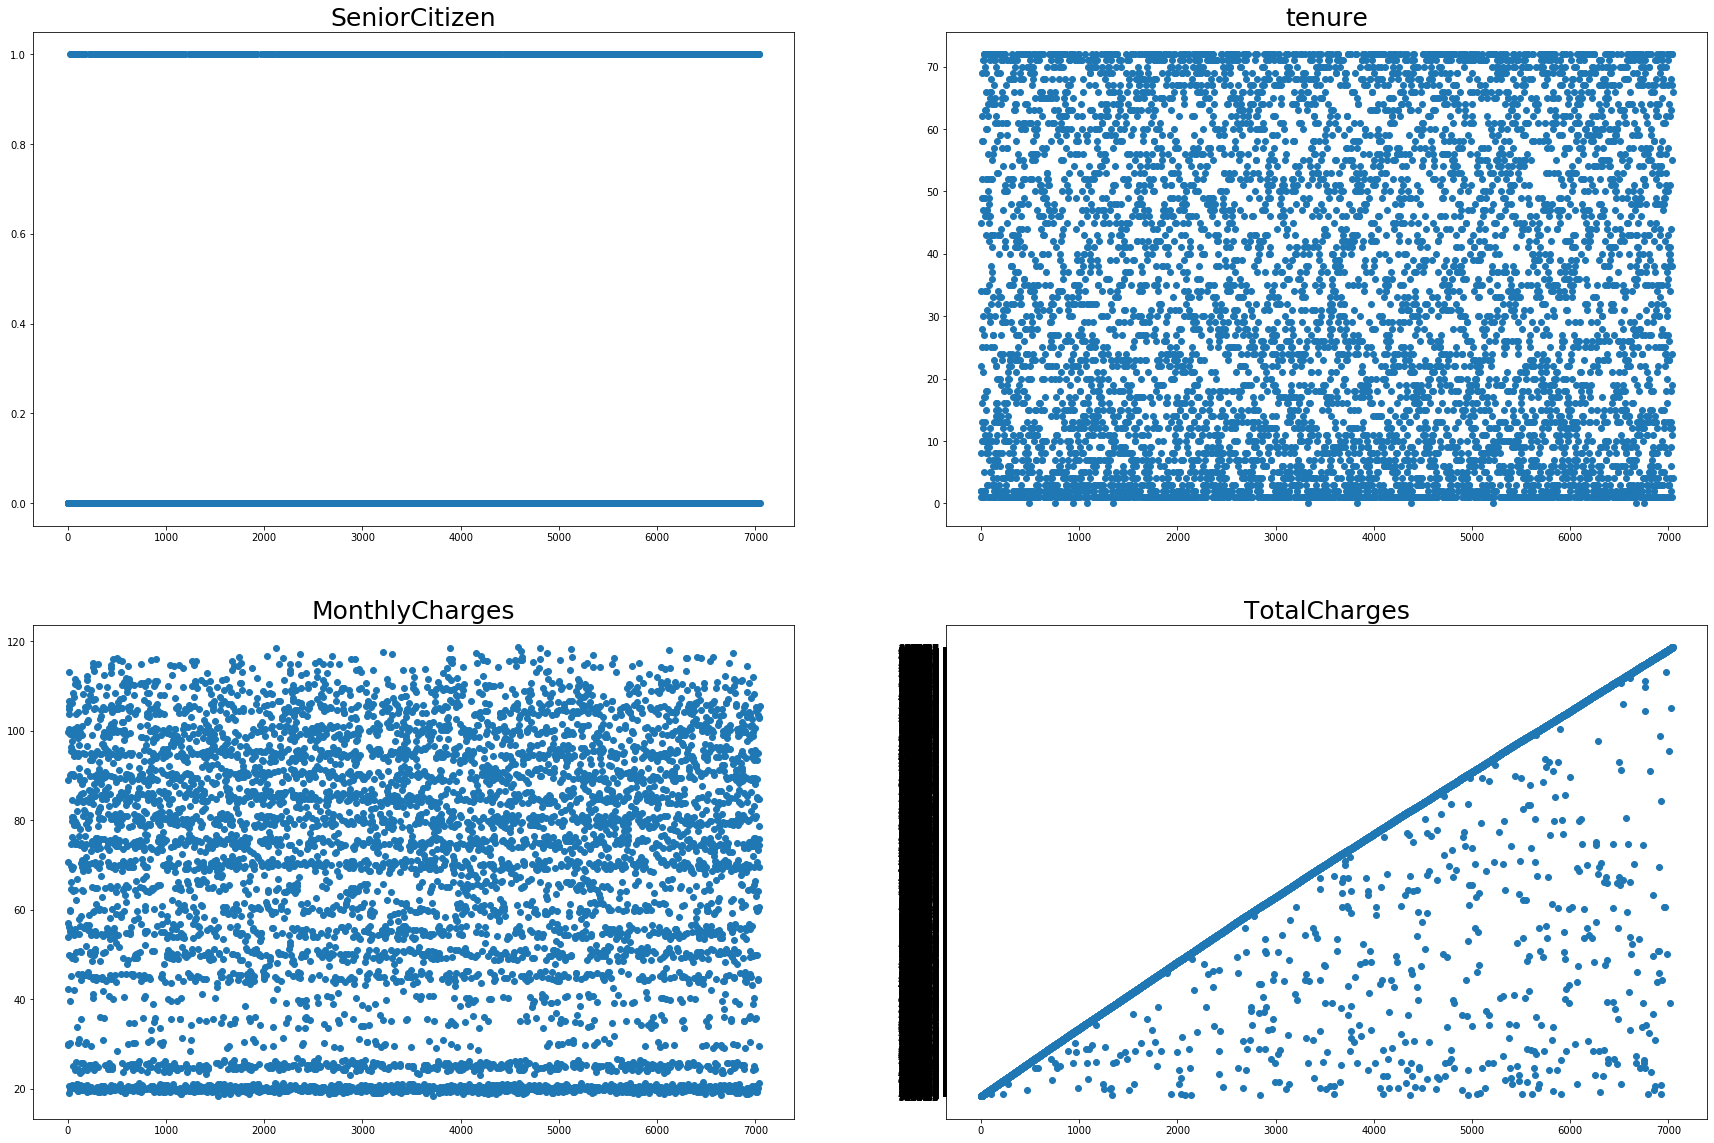

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=False, figsize=(30,20))
for j, ax in enumerate(axs.flat):
    ax.plot(telco_df[continuous_var[j]], 'o')
    ax.set_title(continuous_var[j], fontsize = 25)

[0. 0. 1. ... 0. 1. 0.]


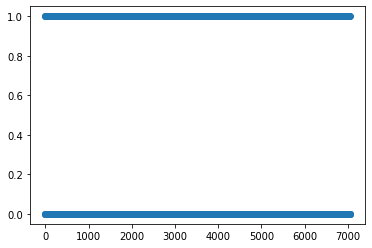

In [49]:
target = np.zeros(len(telco_df))

for i in range(len(telco_df)): 
    if telco_df['Churn'][i] == 'No': 
        target[i] = 0 
    else: target[i] = 1

plt.plot(target, 'o')

## 2.2 

Split data into training and test set. Build a pipeline for dealing with categorical variables.
Evaluate Logistic Regression, linear support vector machines and nearest centroids using
cross-validation. How different are the results? How does scaling the continuous features with
StandardScaler influence the results?

In [47]:
import scipy 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

data = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


X_train, X_test, y_train, y_test = train_test_split(telco_df[continuous_var], telco_df['Churn'], random_state = 66)

knn = KNeighborsClassifier(n_neighbors=1)

for i in range(len(y_train)): 
    if y_train[i] == 'No': 
        y_train[i] = 0
    else: y_train[i] = 1 

print(X_train)
    
if y_train[2] == 'No': y_train[1] = 0 
    
print(y_train[2])

#knn.fit(X_train, y_train)

KeyError: 3